# Pre-Processing

### Importing Libraries and Dataset

In [569]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [570]:
dataset = pd.read_csv('sample_data/Telco-Customer-Churn.csv')
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


### Dataset Details, Null Values, and Duplicate Identifications

In [571]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [572]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [573]:
#identifying the datatypes of each column
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [574]:
#We have noticed that the TotalCharges column is of type object. We will convert it to numeric after removing the empty strings and string with just one space

replacement_value = '0.00'
pattern = r'^\s*$'

#replaces empty and space strings with 0.00
dataset['TotalCharges']  = dataset['TotalCharges'].replace(pattern, replacement_value, regex=True)

#parses the column to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

In [575]:
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [576]:
#identifying if any of the features have duplicate values
dataset.duplicated()

print('Total number of duplicate values: ', dataset.duplicated().sum())

Total number of duplicate values:  0


###Removing Outliers

In [577]:
# Example of outlier removal using IQR for the 'TotalCharges' feature
Q1 = dataset['TotalCharges'].quantile(0.25)
Q3 = dataset['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1

# Defining outliers as any point outside of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outlier_condition = ((dataset['TotalCharges'] < (Q1 - 1.5 * IQR)) |(dataset['TotalCharges'] > (Q3 + 1.5 * IQR)))

# Removing outliers
dataset_no_outliers = dataset[~outlier_condition]

print(f"Original dataset shape: {dataset.shape}")
print(f"New dataset shape: {dataset_no_outliers.shape}")


Original dataset shape: (7043, 21)
New dataset shape: (7043, 21)


### Feature Selection Based on Simple Domain Expertise

In [578]:
selected_dataset = dataset.drop(['customerID', 'gender','MonthlyCharges'],axis=1)

In [579]:
# Ensure 'tenure' is not zero to avoid division by zero errors
dataset['tenure'] = dataset['tenure'].replace(0, np.nan)  # Optional: handle 0 or very low tenure in a way that makes sense for your analysis

# Creating new feature 'ChargePerMonth'
dataset['ChargePerMonth'] = dataset['TotalCharges'] / dataset['tenure']

# Handling possible infinities or NaNs after division
dataset['ChargePerMonth'] = dataset['ChargePerMonth'].replace([np.inf, -np.inf], np.nan)
dataset['ChargePerMonth'].fillna(dataset['ChargePerMonth'].mean(), inplace=True)  # Replace NaNs with the mean or another statistic that makes sense

print(dataset['ChargePerMonth'])


0        29.850000
1        55.573529
2        54.075000
3        40.905556
4        75.825000
           ...    
7038     82.937500
7039    102.262500
7040     31.495455
7041     76.650000
7042    103.704545
Name: ChargePerMonth, Length: 7043, dtype: float64


In [580]:
selected_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


### Exploratory Data Analysis

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

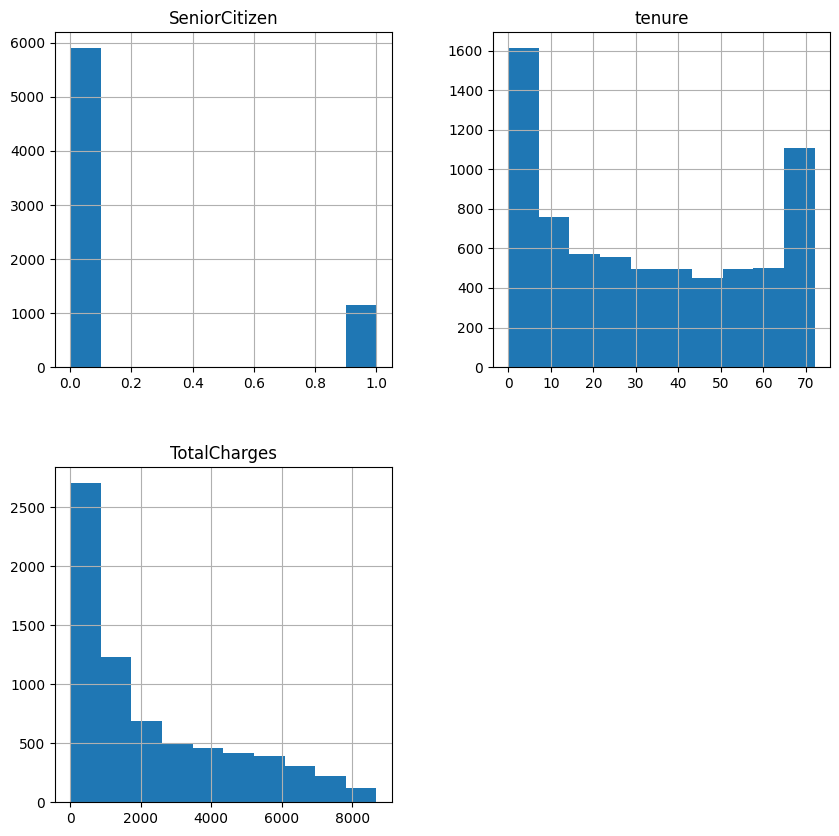

In [581]:
#view the histogram per each numerical column
selected_dataset.hist(figsize=(10,10))

In [582]:
categ_columns = []
for col in selected_dataset.columns:
	if dataset[col].nunique()<10:
		categ_columns.append(col)

print('categ numericals columns are {}'.format(categ_columns))

categ numericals columns are ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


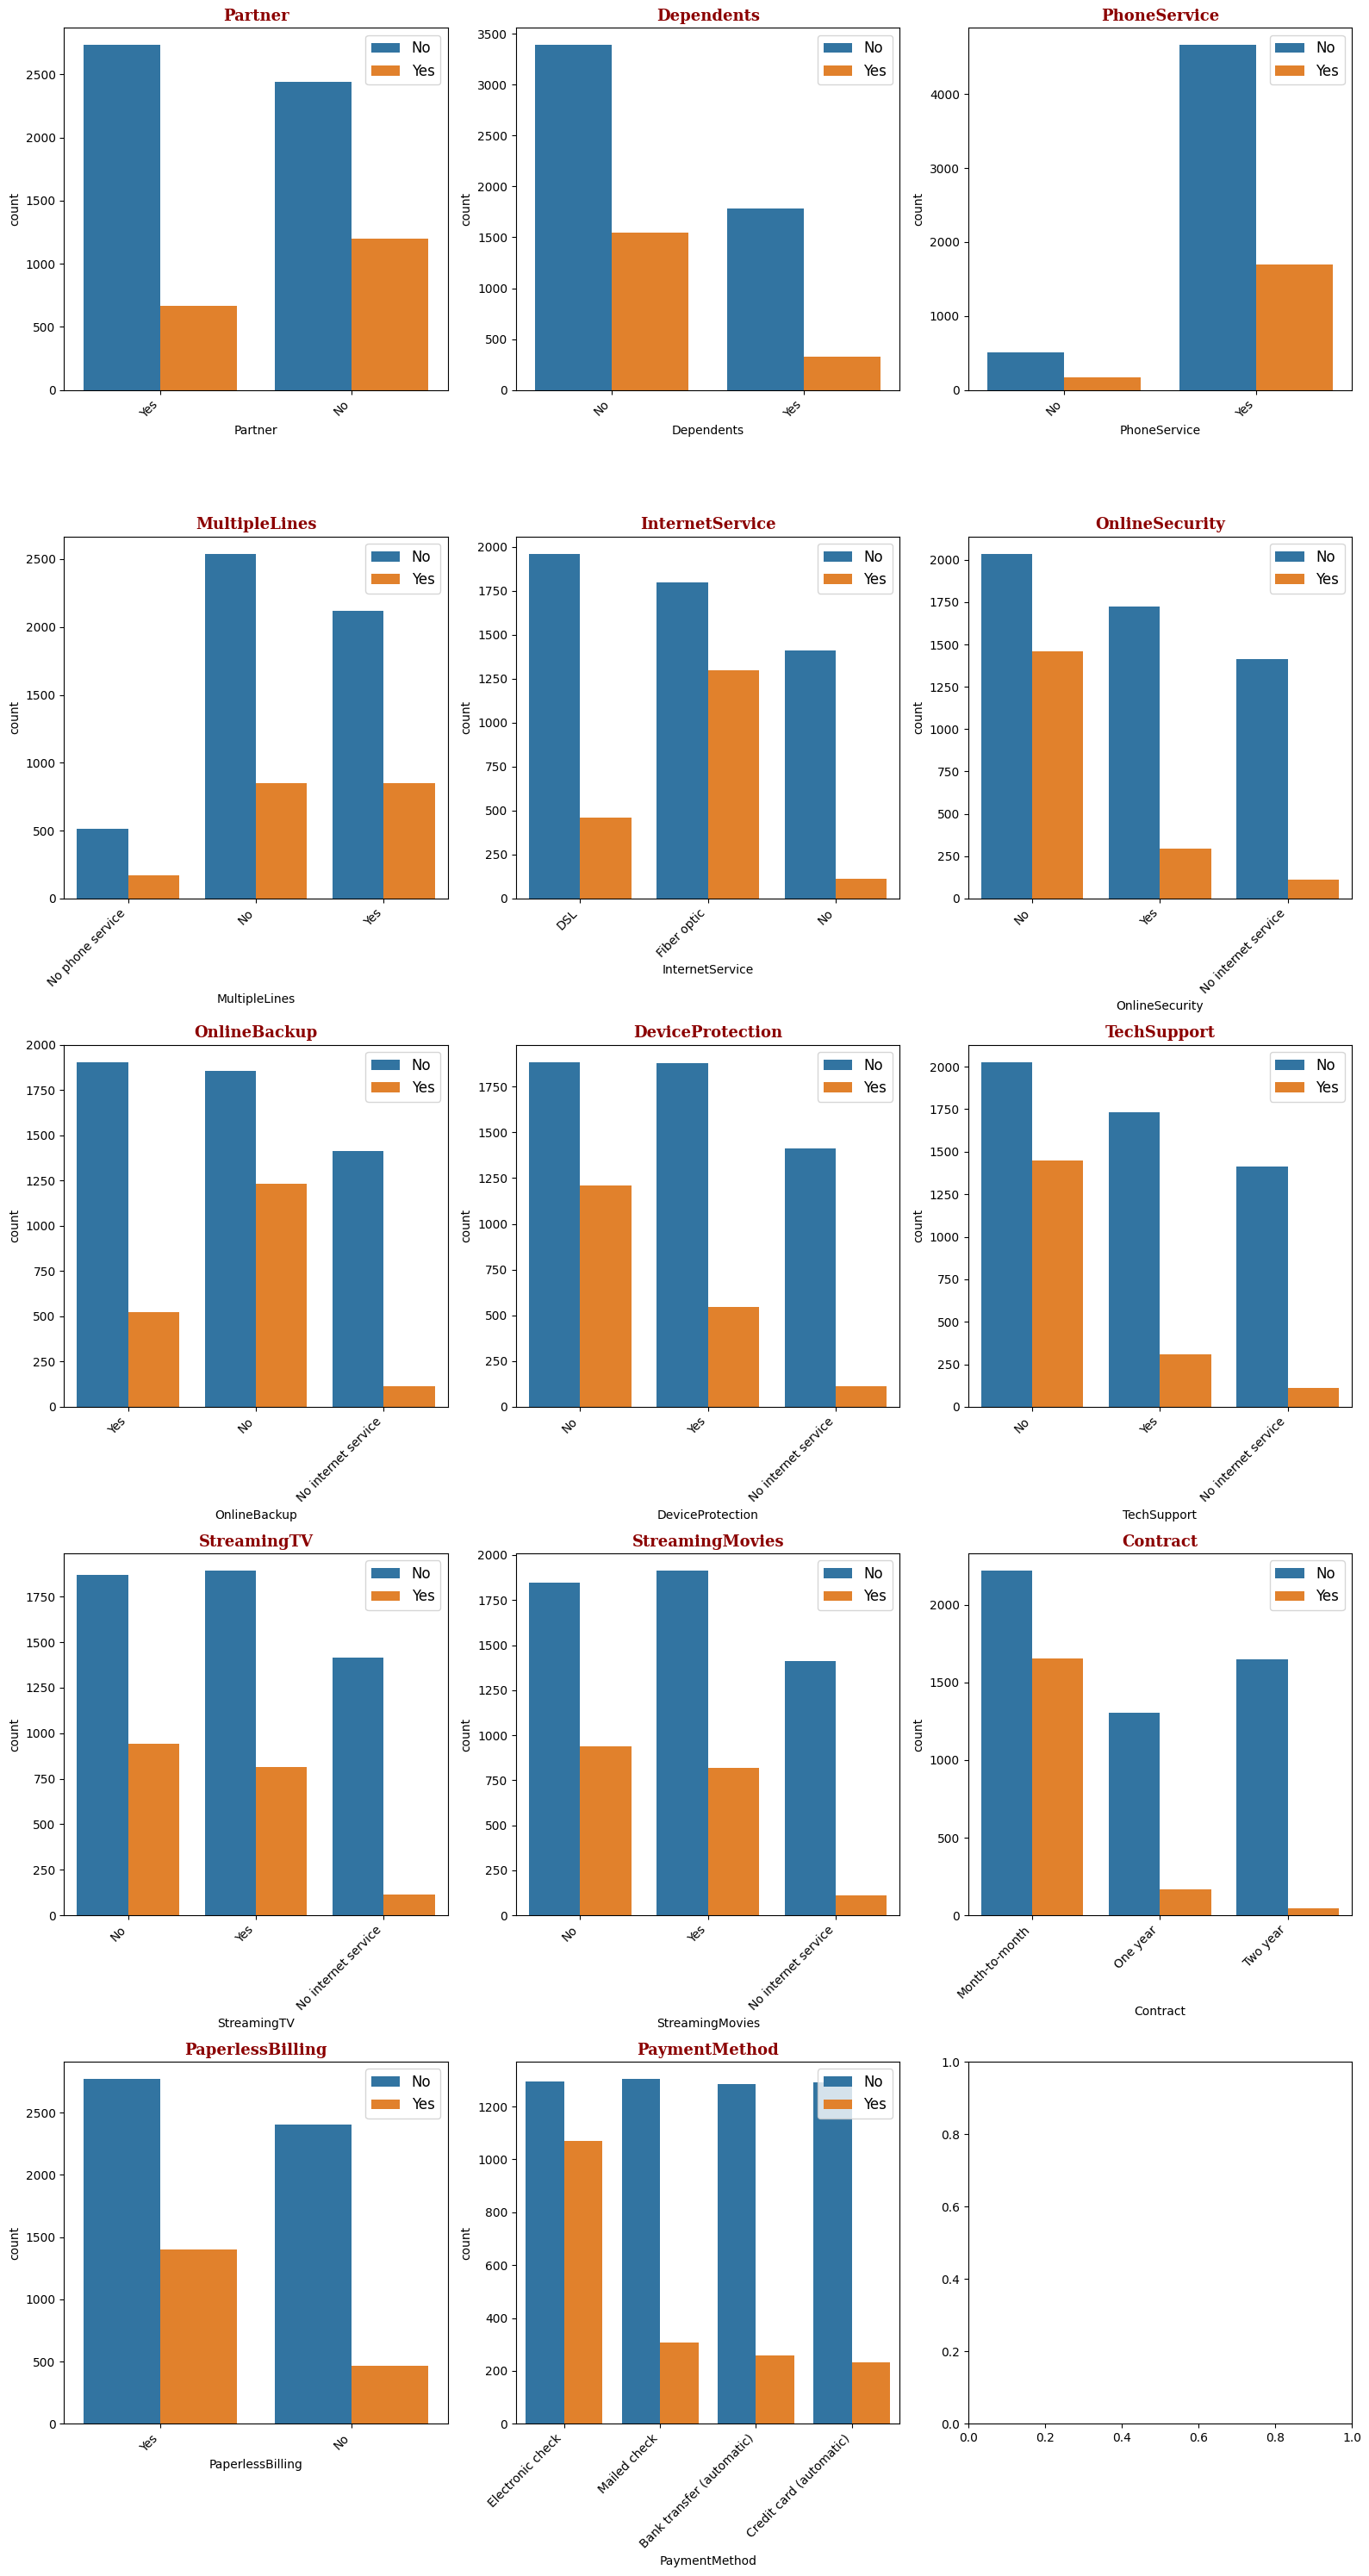

In [583]:
#For categorical columns, we will be using a countplot to visualize the distribution of the data
# Filter categorical columns
categ_columns = [col for col in selected_dataset.select_dtypes(include=['object']).columns if col not in ['customerID', 'Churn']]

# Create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 13}
axlab_dict = {'family': 'serif', 'color': 'black', 'size': 13}

# Calculate the number of rows and columns dynamically based on the number of categorical columns
num_cols = 3  # Number of columns in the grid
num_rows = (len(categ_columns) - 1) // num_cols + 1  # Calculate the number of rows needed

# Define the figsize with a larger height
fig_height = 6 * num_rows  # Adjust height based on the number of rows
fig_width = 16

# Create figure with dynamic grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=[fig_width, fig_height])
#fig.suptitle('Bivariate Analysis', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

# Loop through each categorical column and create countplots
for i, col in enumerate(categ_columns):
    row_idx = i // num_cols  # Calculate the row index
    col_idx = i % num_cols   # Calculate the column index
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]  # Handle single row case
    sns.countplot(x=selected_dataset[col], hue=selected_dataset['Churn'], ax=ax)
    ax.set_title(col, fontdict=axtitle_dict)
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels if needed
    ax.legend(fontsize=12)

# Adjust spacing
fig.tight_layout()

# Show plot
plt.show()


### Creating Independent and Dependent Variables

In [584]:
X = selected_dataset.iloc[:,:-1].values
y = selected_dataset.iloc[:,-1].values

### Encoding Categorical Independent Data

In [585]:
selected_dataset.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [586]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

print(f'pre encoded data: {X[0]}\n') #pre encoded data

#encoding categorical columns to meaningful binary values
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(f'Post encoded data: {X[0]}')

pre encoded data: [0 'Yes' 'No' 1 'No' 'No phone service' 'DSL' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'Month-to-month' 'Yes' 'Electronic check' 29.85]

Post encoded data: [1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 1 29.85]


### Encoding Categorical Dependent Variables

In [587]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(f'Post encoded target data: {y}')

Post encoded target data: [0 0 1 ... 0 1 0]


### Normalization via MinMax Scaler

In [588]:
from sklearn.preprocessing import MinMaxScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = min_max_scaler.fit_transform(data_to_normalize) #transforms the entire X numpy array to normalized values

minmax_X = X.copy()
minmax_X[:, -2:] = normalized_data
print(minmax_X[0])

[1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 0.013888888888888888 0.0034370394252026537]


###Normalization via StandardScaler

In [589]:
print(X[0])

[1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 1 29.85]


In [590]:
from sklearn.preprocessing import StandardScaler

n_columns = X.shape[1]
data_to_normalize = X[:, -2:]

standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data_to_normalize)

standardized_X = X.copy()
standardized_X[:,-2:] = standardized_data
print(standardized_X[0])

[1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0 0.0 0.0 1.0 0.0 -1.2774445836787776 -0.9926105235902283]


### Splitting the Dataset into Training, Validating and Testing

In [591]:
print(standardized_X.shape)

(7043, 43)


In [592]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Handling Imbalanced Data (Optional Dataset)

<Axes: xlabel='Churn', ylabel='count'>

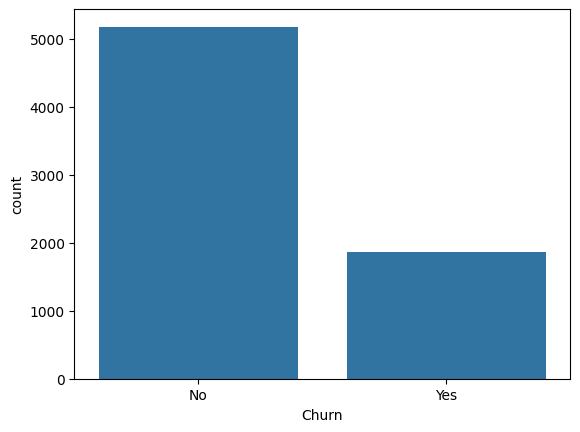

In [593]:
sns.countplot(x='Churn', data=dataset)

In [594]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0: {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1: {}'.format(sum(y_train==1)))

sm = SMOTE(sampling_strategy=1,random_state=1)
x_train_s, y_train_s = sm.fit_resample(X_train,y_train)

print("After upsampling count of label 0: {}".format(sum(y_train_s==0)))
print("After upsampling count of label 1: {}".format(sum(y_train_s==1)))

Before upsampling count of label 0: 3635
Before upsampling count of label 1: 1295
After upsampling count of label 0: 3635
After upsampling count of label 1: 3635


In [595]:
#Available Datasets for Predictions
#0.1 Total Dataset -> StandardScaler
print(standardized_X.shape)
print(y.shape)

#0.2 Total Dataset -> MinMaxScaler
print(minmax_X.shape)
print(y.shape)

#1. Training dataset
print(X_train.shape)
print(y_train.shape)

#2. Training upsampled dataset -> VIA SMOTE
print(x_train_s.shape)
print(y_train_s.shape)

#3. Testing dataset
print(X_test.shape)
print(y_test.shape)

(7043, 43)
(7043,)
(7043, 43)
(7043,)
(4930, 43)
(4930,)
(7270, 43)
(7270,)
(2113, 43)
(2113,)


#Applying Random Forest on the dataset


###Model Training , Testing and Validating

In [596]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_predict,cross_validate, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [597]:
# Initialize the random forest model
rf_model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)

# Specify the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate mean testing accuracy
cv_results_rf = cross_validate(rf_model, standardized_X, y, cv=kfold, scoring='accuracy')
mean_test_accuracy_rf = cv_results_rf['test_score'].mean()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy on training set with Random Forest: {train_accuracy_rf * 100:.2f}%")

# Print mean testing accuracy for random forest
print(f"Mean testing accuracy on standardized total dataset with Random Forest: {mean_test_accuracy_rf * 100:.2f}%")

# Predict on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Testing Accuracy on testing set with Random Forest: {test_accuracy_rf * 100:.2f}%")




Training Accuracy on training set with Random Forest: 81.20%
Mean testing accuracy on standardized total dataset with Random Forest: 80.09%
Testing Accuracy on testing set with Random Forest: 80.12%


###Evaluation of accuracies with Hyperparameter Tuning

In [598]:
# Instantiate the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict the mode
y_pred = model.predict(X_test)

# performance evaluation metrics
print(classification_report(y_pred, y_test))

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred)
print("Testing Accuracy on training set with Random Forest: {:.2f}%".format(test_accuracy_rf * 100))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1689
           1       0.47      0.64      0.54       424

    accuracy                           0.78      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.81      0.78      0.80      2113

Testing Accuracy on training set with Random Forest: 78.42%


In [599]:
param_grid = {
	'n_estimators': [25, 50, 100, 150],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 9],
	'max_leaf_nodes': [3, 6, 9],
}


###Hyperparameter Tuning- GridSearchCV

In [600]:
grid_search = GridSearchCV(RandomForestClassifier(),
						param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25)


In [601]:
#Update the Model
model_grid = RandomForestClassifier(max_depth=9,max_features="log2",max_leaf_nodes=9,n_estimators=25)
model_grid.fit(X_train, y_train)
y_pred_grid = model.predict(X_test)
print(classification_report(y_pred_grid, y_test))

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred_grid)
print("Testing Accuracy on training set with Random Forest: {:.2f}%".format(test_accuracy_rf * 100))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1689
           1       0.47      0.64      0.54       424

    accuracy                           0.78      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.81      0.78      0.80      2113

Testing Accuracy on training set with Random Forest: 78.42%


###Hyperparameter Tuning- RandomizedSearchCV

In [602]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
								param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)


RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)


In [603]:
#Update the Model
model_random = RandomForestClassifier(max_depth=3,
									max_features='log2',
									max_leaf_nodes=6,
									n_estimators=100)
model_random.fit(X_train, y_train)
y_pred_rand = model.predict(X_test)
print(classification_report(y_pred_rand, y_test))

# Calculate accuracy on the test set
test_accuracy_rf = accuracy_score(y_test, y_pred_rand)
print("Testing Accuracy on training set with Random Forest: {:.2f}%".format(test_accuracy_rf * 100))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1689
           1       0.47      0.64      0.54       424

    accuracy                           0.78      2113
   macro avg       0.69      0.73      0.70      2113
weighted avg       0.81      0.78      0.80      2113

Testing Accuracy on training set with Random Forest: 78.42%


#Model Evaluation

###Classification Report

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



###Confusion Matrix

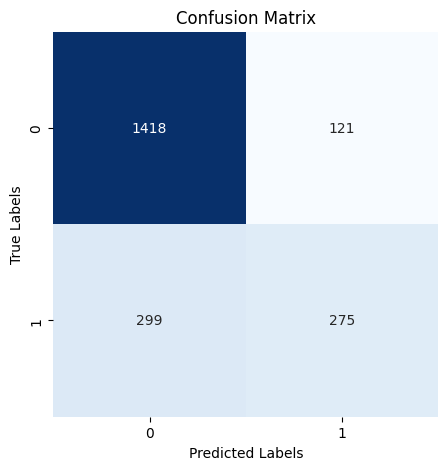

In [605]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


###ROC Curve and AUC

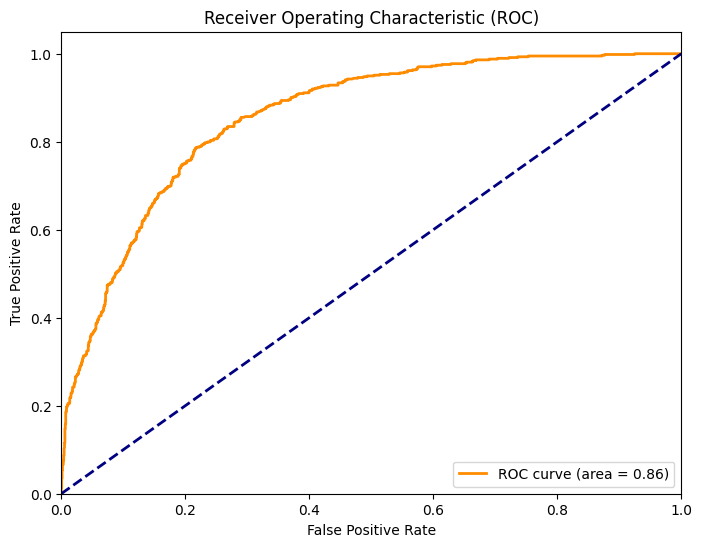

In [606]:
# Compute ROC curve and AUC
y_scores = rf_model.predict_proba(X_test)[:, 1] # score = probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


###Precision-Recall Curve

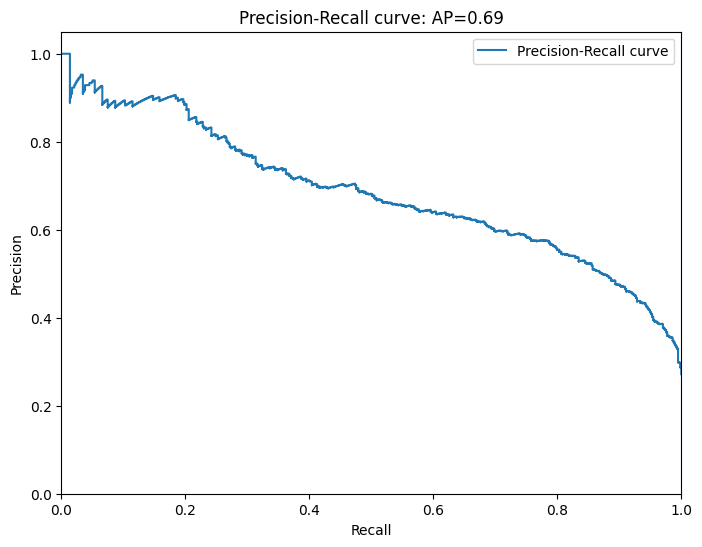

In [607]:
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="best")
plt.show()


###Feature Importance

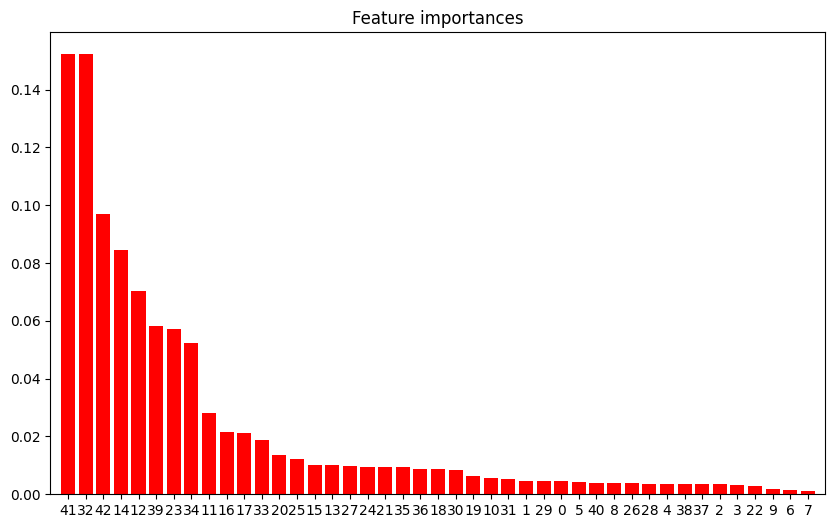

In [608]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


###Learning Curve

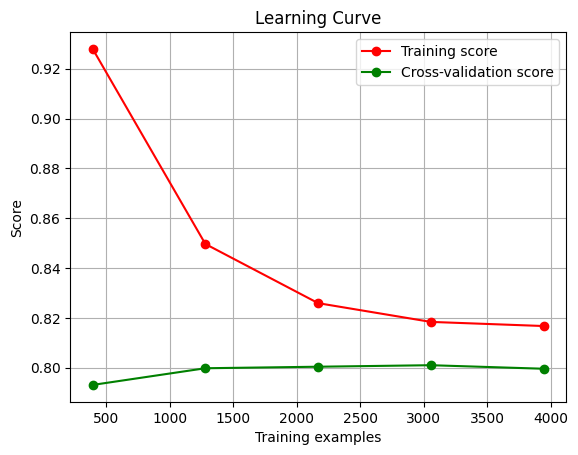

In [609]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid("on")
if plt.ylim()[1] > 1:
    plt.ylim(0.7, 1.01) # Adjust based on your specific scores
plt.title("Learning Curve")
plt.show()
